In [1]:
# importing libraries
import pandas as pd
import numpy as np
import csv
import os
import seaborn as sns
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
# data into dataframe
data = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv", low_memory=False)


In [3]:
data.head(2)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N


In [4]:
# data dimensions , 194673 rows/accidents and 38 attributes/ columns
data.shape

(194673, 38)

In [5]:
# below unwanted columns deleted as they do not need or primary data to predict accident severity
data.drop(['X', 'Y', 'INTKEY', 'INCKEY','INCDATE', 'COLDETKEY','PERSONCOUNT','VEHCOUNT','JUNCTIONTYPE','SDOT_COLCODE','ST_COLCODE','REPORTNO','STATUS','SDOTCOLNUM','EXCEPTRSNCODE', 'EXCEPTRSNDESC','SEVERITYCODE.1', 'SEVERITYDESC','PEDCOUNT', 'PEDCYLCOUNT','LOCATION', 'PEDROWNOTGRNT', 'ST_COLDESC','SDOT_COLDESC'],axis = 1, inplace=True)
data.head()

,SEVERITYCODE,OBJECTID,ADDRTYPE,COLLISIONTYPE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,1,Intersection,Angles,3/27/2013 2:54:00 PM,NaN,N,Overcast,Wet,Daylight,NaN,0,0,N
1,1,2,Block,Sideswipe,12/20/2006 6:55:00 PM,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,0,0,N
2,1,3,Block,Parked Car,11/18/2004 10:20:00 AM,NaN,0,Overcast,Dry,Daylight,NaN,0,0,N
3,1,4,Block,Other,3/29/2013 9:26:00 AM,NaN,N,Clear,Dry,Daylight,NaN,0,0,N
4,2,5,Intersection,Angles,1/28/2004 8:04:00 AM,NaN,0,Raining,Wet,Daylight,NaN,0,0,N


In [6]:
data.shape

(194673, 14)

In [7]:
#Adding Year, month and week columns as they paly primary role of predicting accident severity
import datetime
data['INCDTTM'] = pd.to_datetime(data['INCDTTM'], errors='coerce')
data['YEAR'] = data['INCDTTM'].dt.strftime('%Y')
data['MONTH'] = data['INCDTTM'].dt.strftime('%m')
data['WEEKDAY'] = data['INCDTTM'].dt.strftime('%w')

In [8]:
data.head()

,SEVERITYCODE,OBJECTID,ADDRTYPE,COLLISIONTYPE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,YEAR,MONTH,WEEKDAY
0,2,1,Intersection,Angles,2013-03-27 14:54:00,NaN,N,Overcast,Wet,Daylight,NaN,0,0,N,2013,03,3
1,1,2,Block,Sideswipe,2006-12-20 18:55:00,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,0,0,N,2006,12,3
2,1,3,Block,Parked Car,2004-11-18 10:20:00,NaN,0,Overcast,Dry,Daylight,NaN,0,0,N,2004,11,4
3,1,4,Block,Other,2013-03-29 09:26:00,NaN,N,Clear,Dry,Daylight,NaN,0,0,N,2013,03,5
4,2,5,Intersection,Angles,2004-01-28 08:04:00,NaN,0,Raining,Wet,Daylight,NaN,0,0,N,2004,01,3


In [9]:
data["YEAR"].value_counts()

2006    15188
2005    15115
2007    14456
2008    13660
2015    12995
2004    11865
2014    11841
2009    11734
2016    11659
2011    10919
2012    10907
2017    10873
2010    10808
2013    10577
2018    10419
2019     9412
2020     2245
Name: YEAR, dtype: int64

Text(0.5, 0, 'Severity')

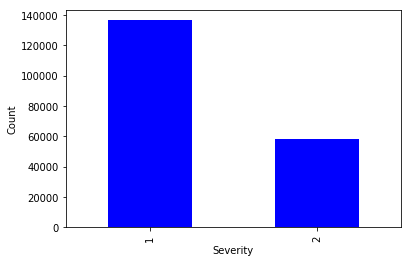

In [10]:
data['SEVERITYCODE'].value_counts().plot(kind='bar', color='b')
plt.ylabel('Count')
plt.xlabel('Severity')

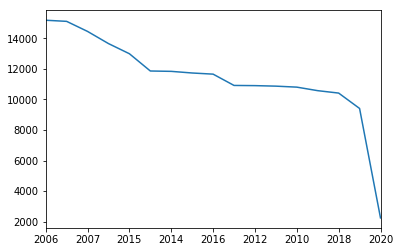

In [11]:
#Yearwise = data.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
yearwise = data["YEAR"].value_counts()
yearwise.plot()

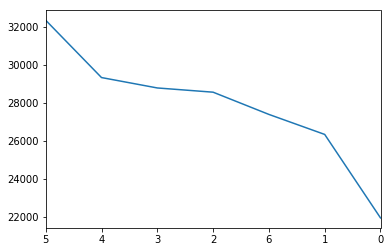

In [12]:
Weekwise = data["WEEKDAY"].value_counts()
Weekwise.plot()

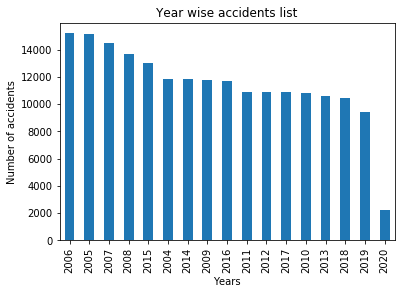

In [13]:
yearwise.plot(kind='bar')

plt.title('Year wise accidents list')
plt.ylabel('Number of accidents')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
#plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show()

In [14]:
data.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True)


ADDRTYPE      SEVERITYCODE
Alley         1               0.890812
              2               0.109188
Block         1               0.762885
              2               0.237115
Intersection  1               0.572476
              2               0.427524
Name: SEVERITYCODE, dtype: float64

In [15]:
feature = data[['MONTH', 'WEEKDAY']]
feature = pd.concat([feature,pd.get_dummies(data['ADDRTYPE'])], axis=1)
feature.head()


,MONTH,WEEKDAY,Alley,Block,Intersection
0,03,3,0,0,1
1,12,3,0,1,0
2,11,4,0,1,0
3,03,5,0,1,0
4,01,3,0,0,1


In [16]:
X = feature
X[0:5]

,MONTH,WEEKDAY,Alley,Block,Intersection
0,03,3,0,0,1
1,12,3,0,1,0
2,11,4,0,1,0
3,03,5,0,1,0
4,01,3,0,0,1


In [17]:
y= data['SEVERITYCODE'].values
y[0:6]

array([2, 1, 1, 1, 2, 1])

In [18]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, object were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[-1.03492014, -0.07696472, -0.06223095, -1.36876932,  1.41129279],
       [ 1.58895071, -0.07696472, -0.06223095,  0.73058329, -0.70857019],
       [ 1.29740951,  0.4386221 , -0.06223095,  0.73058329, -0.70857019],
       [-1.03492014,  0.95420892, -0.06223095,  0.73058329, -0.70857019],
       [-1.61800255, -0.07696472, -0.06223095, -1.36876932,  1.41129279]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 5) (155738,)
Test set: (38935, 5) (38935,)


In [ ]:
# Importing the KNN model
from sklearn.neighbors import KNeighborsClassifier

# Importing the metrics
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.60788494, 0.68152048, 0.6368563 , 0.68878901, 0.65272891,
       0.67818158, 0.64931296, 0.68606652, 0.66939771])

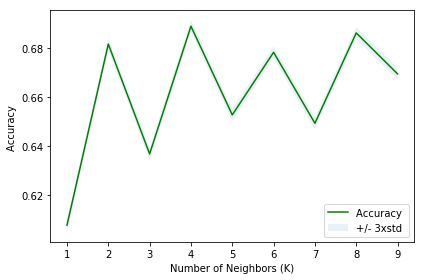

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
#Predict the K near neigher value 
yhat = neigh.predict(X_test)
yhat[0:5]
k = 4

# Train Model and Predict  
collknn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
collknn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

## SVM

In [ ]:
# Import the library for SVM Classifier
from sklearn import svm

svm1 = svm.SVC(kernel='rbf').fit(X_train, y_train)
yhat1 = svm1.predict(X_test)
svm_r = metrics.accuracy_score(y_test, yhat1)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
# Build a SVM Classifier with a Linear Kernel
svm2 = svm.SVC(kernel='linear').fit(X_train, y_train)
yhat2 = svm2.predict(X_test)
svm_l = metrics.accuracy_score(y_test, yhat2)

In [ ]:
# Build a SVM Classifier with a Polynomial Kernel
svm3 = svm.SVC(kernel='poly').fit(X_train, y_train)
yhat3 = svm3.predict(X_test)
svm_p = metrics.accuracy_score(y_test, yhat3)

In [ ]:
# Build a SVM Classifier with a Sigmoid Kernel
svm4 = svm.SVC(kernel='sigmoid').fit(X_train, y_train)
yhat4 = svm4.predict(X_test)
svm_s = metrics.accuracy_score(y_test, yhat4)

In [ ]:
print("rbf : ",svm_r,"\nlinear : ",svm_l,"\npolynomial : ",svm_p,"\nsigmoid : ",svm_s)

In [ ]:
# Import the library for Logistice regression
from sklearn.linear_model import LogisticRegression

# Build and train the logestic regression model
lr1 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat1 = lr1.predict(X_test)
re1 = metrics.accuracy_score(y_test, yhat1)

In [ ]:


# Build and train the logestic regression model
lr2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat2 = lr2.predict(X_test)
re2 = metrics.accuracy_score(y_test, yhat2)

In [ ]:


# Build and train the logestic regression model
lr3 = LogisticRegression(C=0.01, solver='saga').fit(X_train,y_train)
yhat3 = lr3.predict(X_test)
re3 = metrics.accuracy_score(y_test, yhat3)

In [ ]:
# Build and train the logestic regression model
lr4 = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)
yhat4 = lr4.predict(X_test)
re4 = metrics.accuracy_score(y_test, yhat4)

In [ ]:
# Build and train the logestic regression model
lr5 = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
yhat5 = lr5.predict(X_test)
re5 = metrics.accuracy_score(y_test, yhat5)

In [ ]:
print("liblinear : ",re1,"\nsag       : ",re2,"\nsaga      : ",re3,"\nnewton-cg : ",re4,"\nlbfgs     : ", re5)

In [ ]:
lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = lr.predict(X_test)
yhat

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, lr.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

In [ ]:
f1_score(y_test, yhat, average='weighted')


In [ ]:
jaccard_similarity_score(y_test, yhat)


In [ ]:
yhat_prob = lr.predict_proba(X_test)
yhat_prob

In [ ]:
Jaccard = [jsc_knn,jsc_dt,jsc_svm,jsc_lr]
F1_score = [f1_knn,f1_dt,f1_svm,f1_lr]
LogLoss = ['NA','NA','NA',ll_lr]

    
df = {'Algorithm': ['KNN', 'Decistion Tree', 'SVM', 'LogisticRegression'], \
     'Jaccard': Jaccard, 'F1-score': F1_score, 'LogLoss': LogLoss}

Report = pd.DataFrame(data=data, columns=['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'], index=None)
Report